In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tpu-getting-started/sample_submission.csv
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/09-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/14-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/01-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/13-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/00-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/07-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/12-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/11-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/05-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/04-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/15-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecord

In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Define the path to the train directory
path = "/kaggle/input/tpu-getting-started/tfrecords-jpeg-192x192/train/"

# Step 2: List all TFRecord files in the directory
train_filenames = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.tfrec')]

2024-08-20 19:21:29.552109: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 19:21:29.552245: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 19:21:29.723420: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Number of classes in the dataset
NUM_CLASSES = 104

# Step 3: Define a function to parse the TFRecord files
def parse_tfrecord_fn(example):
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "class": tf.io.FixedLenFeature([], tf.int64)
    }
    example = tf.io.parse_single_example(example, feature_description)
    image = tf.image.decode_jpeg(example['image'], channels=3)
    image = tf.image.resize(image, [192, 192])
    
    label = tf.one_hot(example['class'], depth=NUM_CLASSES)  # One-hot encode the label
    
    return image, label

# Step 4: Load the dataset using the list of filenames
def load_dataset(filenames):
    raw_dataset = tf.data.TFRecordDataset(filenames)
    parsed_dataset = raw_dataset.map(parse_tfrecord_fn)
    return parsed_dataset

# Load the training dataset
train_dataset = load_dataset(train_filenames)

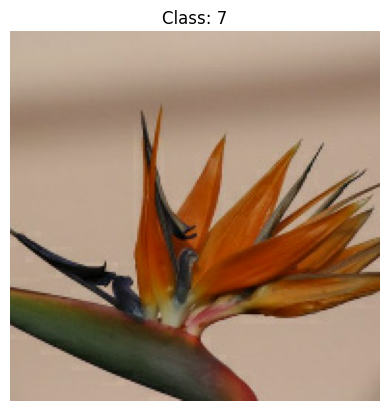

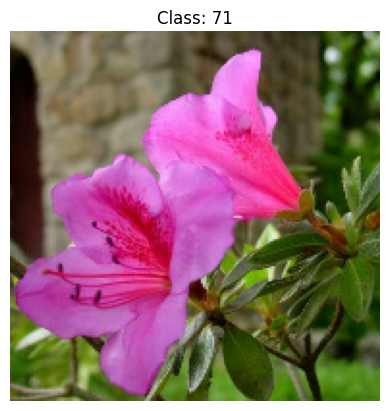

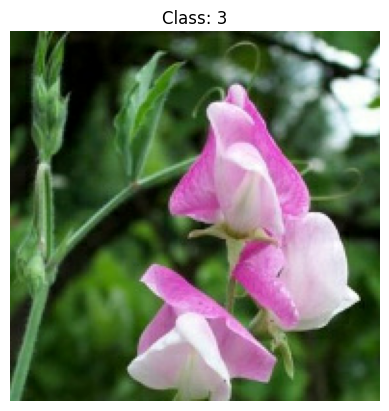

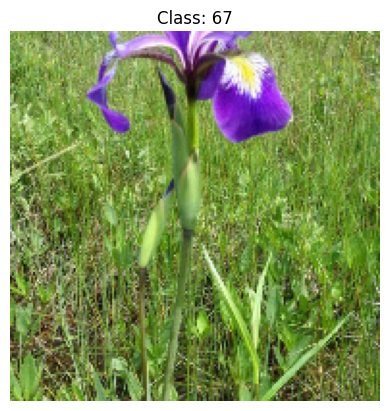

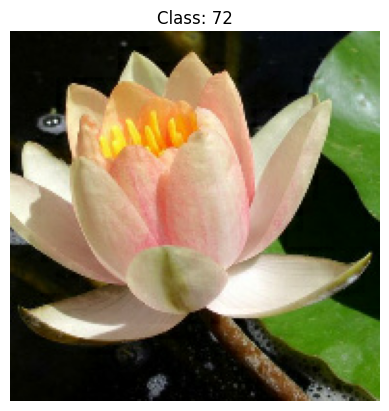

In [4]:
# Step 5: Visualize some images from the dataset (Adjusted for one-hot encoded labels)
try:
    for image, label in train_dataset.take(5):
        plt.figure()
        plt.imshow(image.numpy().astype("uint8"))
        plt.title(f"Class: {tf.argmax(label).numpy()}")  # Display the class index
        plt.axis("off")
        plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

Class distribution in the training dataset:
Class 7: 105 samples
Class 71: 137 samples
Class 3: 21 samples
Class 67: 782 samples
Class 72: 167 samples
Class 96: 100 samples
Class 8: 87 samples
Class 84: 31 samples
Class 51: 105 samples
Class 81: 101 samples
Class 48: 422 samples
Class 76: 119 samples
Class 27: 34 samples
Class 52: 115 samples
Class 32: 23 samples
Class 75: 306 samples
Class 50: 201 samples
Class 4: 703 samples
Class 56: 89 samples
Class 47: 261 samples
Class 19: 26 samples
Class 78: 86 samples
Class 49: 563 samples
Class 0: 272 samples
Class 103: 743 samples
Class 93: 139 samples
Class 45: 172 samples
Class 12: 92 samples
Class 43: 110 samples
Class 46: 125 samples
Class 25: 83 samples
Class 21: 96 samples
Class 102: 390 samples
Class 22: 48 samples
Class 100: 31 samples
Class 17: 50 samples
Class 98: 34 samples
Class 89: 46 samples
Class 24: 85 samples
Class 53: 460 samples
Class 69: 94 samples
Class 77: 139 samples
Class 13: 263 samples
Class 82: 134 samples
Class 62

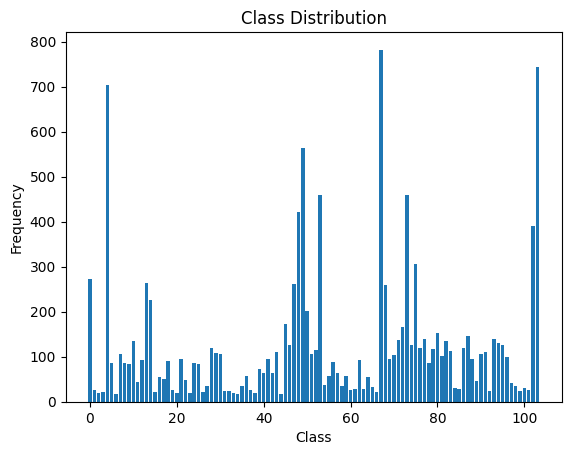

In [5]:
from collections import Counter

# Step 6.1: Count the frequency of each class in the training dataset (Adjusted for one-hot encoded labels)
class_counts = Counter()

for _, label in train_dataset:
    class_index = tf.argmax(label).numpy()  # Convert one-hot to class index
    class_counts[class_index] += 1

# Print the class distribution
print("Class distribution in the training dataset:")
for class_id, count in class_counts.items():
    print(f"Class {class_id}: {count} samples")

# Optionally, plot the class distribution
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Class Distribution")
plt.show()

The dataset contains many class imbalances. This may cause the model to perform better for some classes and not perform good on underpresented classes.
To fix this, I will use data augmentation to artificially increase the size of the minority classes by applying transformations to the images.This will help the model generalize better.

In [6]:
# Step 7: Apply Data Augmentation

# Function to apply data augmentation
def data_augmentation(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))  # Random rotation
    image = tf.image.resize_with_crop_or_pad(image, 224, 224)  # Resize to a larger size and then random crop
    image = tf.image.random_crop(image, size=[192, 192, 3])  # Random crop back to original size
    return image, label

# Apply data augmentation to the training dataset
augmented_train_dataset = train_dataset.map(data_augmentation, num_parallel_calls=tf.data.AUTOTUNE)

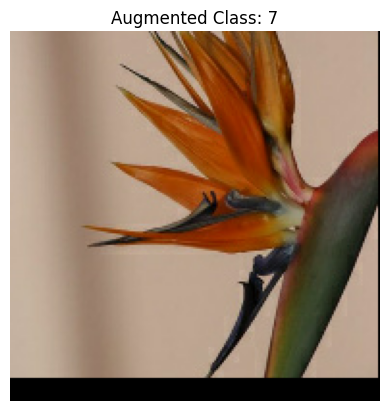

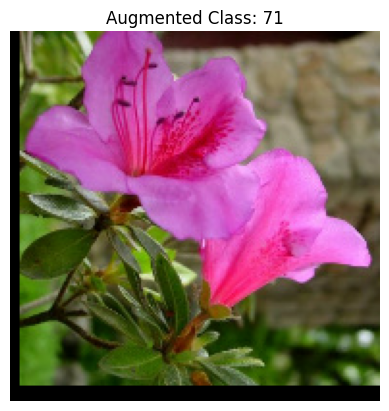

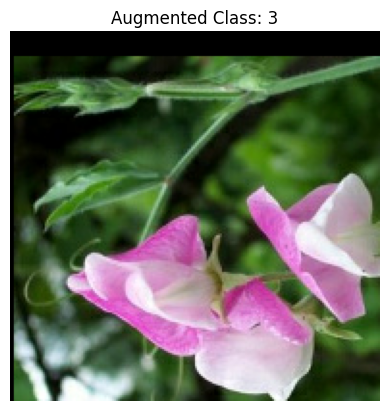

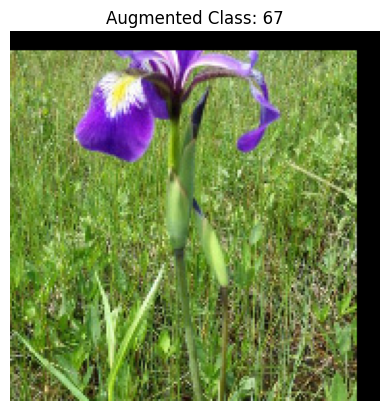

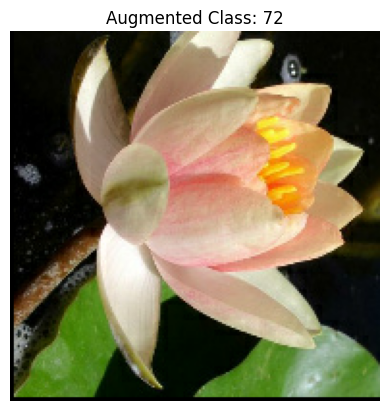

In [7]:
# Visualize some augmented images with class index
for image, label in augmented_train_dataset.take(5):
    plt.figure()
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(f"Augmented Class: {tf.argmax(label).numpy()}")  # Display the class index
    plt.axis("off")
    plt.show()

In [8]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Step 8.1: Load the pre-trained EfficientNetB0 model without the top layers
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(192, 192, 3))

# Freeze the base model
base_model.trainable = False

# Step 8.2: Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling layer
x = Dropout(0.2)(x)  # Add Dropout to prevent overfitting
output = Dense(len(class_counts), activation='softmax')(x)  # Output layer with the number of classes

# Step 8.3: Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Summary of the model
model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 192, 192,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 192, 192,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 192, 192,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 192, 192,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 193, 193,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 96, 96,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 96, 96,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 96, 96,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 96, 96,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 96, 96,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 96, 96,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 96, 96,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 96, 96,    │        512 │ block1a_se_excit

 Total params: 4,182,795 (15.96 MB)

 Trainable params: 133,224 (520.41 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

The EfficientNetB0 model was chosen for several reasons:
1. State of the art performance. Introduced by Google, the model has demonstrated state of the art performance on various image classification benchmarks.
2. Efficiency. As the name suggest the model is efficient
3. The model is already pre-trained.
4. The model generalizes well without overfitting as easily as larger models on smaller datasets
5. The model synergizes well with data augmentation, which was already performed

In [9]:
from tensorflow.keras.optimizers import Adam

# Step 9: Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
# Step 10: Prepare the training and validation datasets

# Define batch size
batch_size = 16

# Batch and prefetch the training data
train_dataset = augmented_train_dataset.repeat().shuffle(1000).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

# Load and prepare the validation dataset similarly
val_path = "/kaggle/input/tpu-getting-started/tfrecords-jpeg-192x192/val/"
val_filenames = [os.path.join(val_path, f) for f in os.listdir(val_path) if f.endswith('.tfrec')]
val_dataset = load_dataset(val_filenames).repeat().batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
# Step 11: Train the model - Abridged Model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=3,
    steps_per_epoch=500,
    validation_steps=100,
)

#callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]

Epoch 1/3
  6/500 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.0151 - loss: 4.7696     

I0000 00:00:1724181760.853097      87 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1724181760.910271      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


497/500 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3272 - loss: 3.0912

W0000 00:00:1724181775.280660      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


500/500 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.3284 - loss: 3.0853 - val_accuracy: 0.6544 - val_loss: 1.4654
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.6493 - loss: 1.4355 - val_accuracy: 0.7550 - val_loss: 1.0169
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7412 - loss: 1.0504 - val_accuracy: 0.7738 - val_loss: 0.9441


In [13]:
# Step 11: Train the model - Abridged Model
# history = model.fit(
#     train_dataset,
#     validation_data=val_dataset,
#     epochs=10,
#     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
# )

I started with a more complex model that included more epochs, unlimited steps, early stopping and callbacks. However, the model would be running at 350% CPU and would timeout even with the accelerators. Therefore, I reduced the model complexity.
If I had more time to fit the model and train it, I would run more epochs. The more complex model was achieving 0.85 accuracy and 0.563 loss after 1 epoch.


In [ ]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

 269537/Unknown 4512s 17ms/step - accuracy: 0.7740 - loss: 0.9212

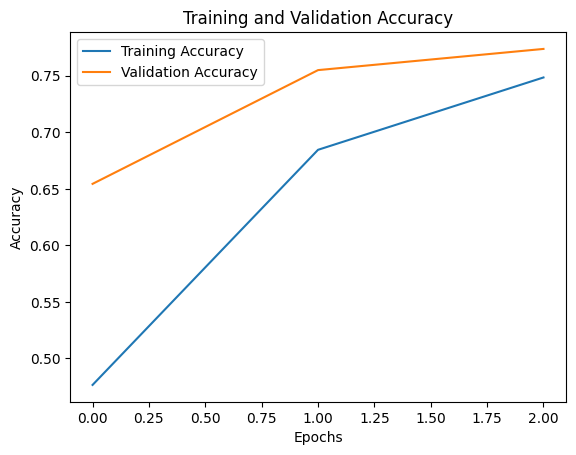

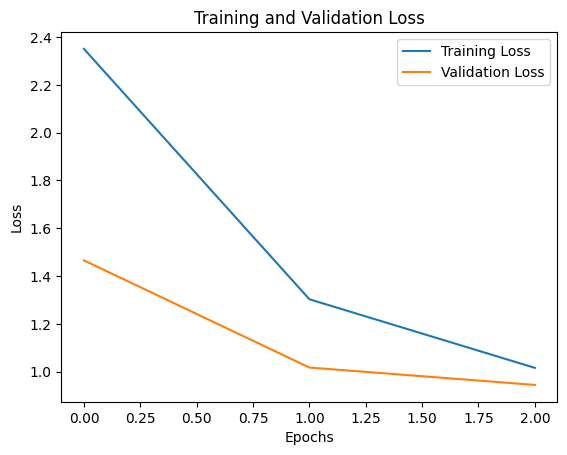

In [12]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Predict on the validation set
predictions = model.predict(val_dataset)

# Convert predictions to class indices
predicted_classes = tf.argmax(predictions, axis=1)

# Compare with true labels
for image, label in val_dataset.take(10):
    true_label = tf.argmax(label, axis=1)
    predicted_label = predicted_classes[:len(true_label)]
    plt.figure()
    plt.imshow(image[0].numpy().astype("uint8"))
    plt.title(f"True: {true_label.numpy()}, Predicted: {predicted_label.numpy()}")
    plt.axis("off")
    plt.show()

In [ ]:
import pandas as pd

# Assuming you have a test dataset loaded in `test_dataset`
predictions = model.predict(test_dataset)
predicted_classes = tf.argmax(predictions, axis=1).numpy()

# Assuming you have a list of test image IDs corresponding to `test_dataset`
submission_df = pd.DataFrame({
    "id": test_image_ids,  # Replace with your actual test image IDs
    "label": predicted_classes
})

submission_df.to_csv("submission.csv", index=False)